In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/Datasets/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.describe

<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       

In [5]:
df["price"].unique()

array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
        9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
        8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
        8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
        7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
        7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
        6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
        6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
        6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
        6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
        5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
        5565000,  5530000,  5523000,  5495000,  5460000,  5425

In [6]:
df["price"].unique().sum()

1150235940

In [7]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
df.dropna(subset=['price'], inplace=True)

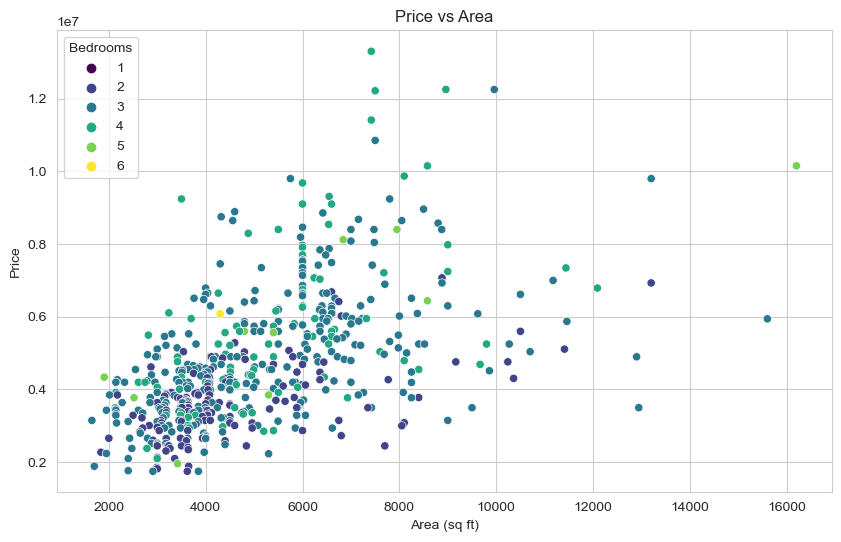

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df, hue='bedrooms', palette='viridis')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend(title='Bedrooms')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


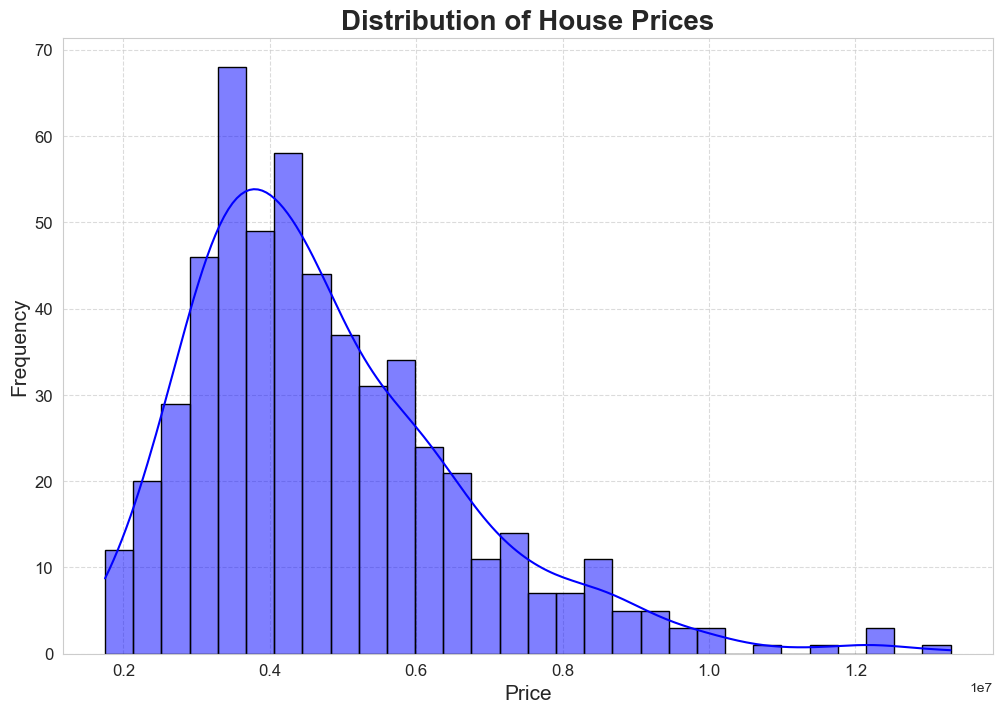

In [10]:
plt.figure(figsize=(12, 8))
sns.histplot(df['price'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of House Prices', fontsize=20, weight='bold')
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a grid
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

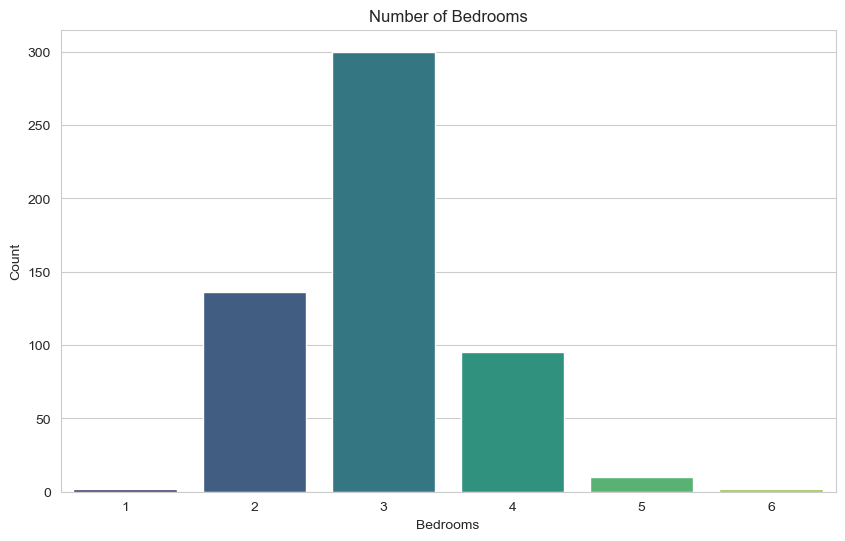

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=df, palette='viridis')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

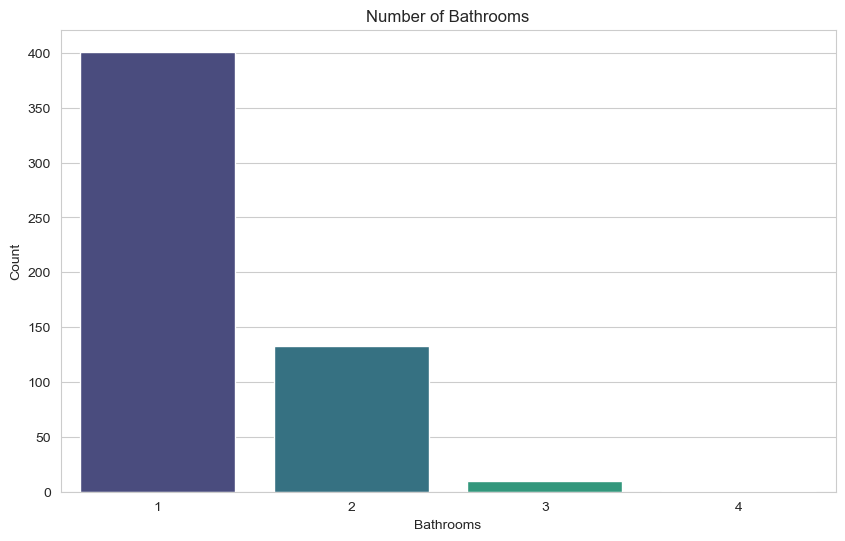

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bathrooms', data=df, palette='viridis')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

In [13]:
df['furnishingstatus'] = df['furnishingstatus'].replace({'unfurnished': 0, "semi-furnished": 1, "furnished": 2})

df['mainroad'] = df['mainroad'].replace({'No': 0, 'Yes': 1})
df['guestroom'] = df['guestroom'].replace({'No': 0, 'Yes': 1})
df['basement'] = df['basement'].replace({'No': 0, 'Yes': 1})
df['hotwaterheating'] = df['hotwaterheating'].replace({'No': 0, 'Yes': 1})
df['airconditioning'] = df['airconditioning'].replace({'No': 0, 'Yes': 1})
df['prefarea'] = df['prefarea'].replace({'No': 0, 'Yes': 1})

df = df.drop(columns=["mainroad"])
df = df.drop(columns=["guestroom"])
df = df.drop(columns=["basement"])
df = df.drop(columns=["hotwaterheating"])
df = df.drop(columns=["airconditioning"])
df = df.drop(columns=["prefarea"])

df

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,13300000,7420,4,2,3,2,2
1,12250000,8960,4,4,4,3,2
2,12250000,9960,3,2,2,2,1
3,12215000,7500,4,2,2,3,2
4,11410000,7420,4,1,2,2,2
...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0
541,1767150,2400,3,1,1,0,1
542,1750000,3620,2,1,1,0,0
543,1750000,2910,3,1,1,0,2


In [14]:
df.price.value_counts()

price
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: count, Length: 219, dtype: int64

In [15]:
# Split features and target variable
X = df.drop(['price'], axis=1)
y = df['price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([5799987.90274049, 6693519.19563736, 3380695.07525265,
       4277429.53220341, 3848955.85821677, 3986321.31023817,
       5809548.53643525, 5923791.42946136, 3089011.83586466,
       3470203.72734681, 9327711.1870206 , 3002690.76438021,
       2938363.02151817, 3706295.36660586, 3621673.65869301,
       5833589.36123496, 3229471.24348341, 4526820.76548679,
       4481731.22609751, 3969865.05660591, 4861288.24226793,
       4364025.02418135, 2917020.63954058, 3865507.52111067,
       5677181.66955605, 7515320.31137214, 2748986.9560832 ,
       5179436.03929584, 7678336.06930578, 3876209.20911596,
       5133891.93218704, 3661101.6092126 , 6543220.73100643,
       4762893.57296133, 4009821.68768321, 5609185.43013634,
       4760888.90002907, 3530369.58551053, 3012387.25942972,
       5261576.39429746, 5301085.15826317, 2911309.29788461,
       6669471.44129641, 4678028.36555677, 4195312.75355231,
       3884090.7137623 , 6659073.59856073, 4610317.47899571,
       4239947.72522207,

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 2240240375247.11
R-Squared: 0.5567891500052817


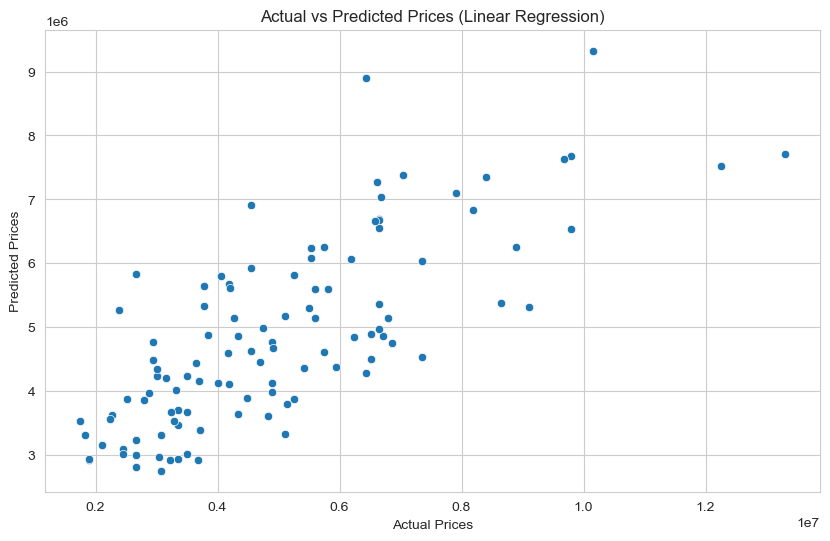

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')

plt.show()